### Imports

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

# encoding imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [8]:
import random
random.seed(42) # setting random seed to be consistent with other models

### Importing Data

In [4]:
df = pd.read_csv('/content/clean_data.csv')

In [5]:
df.head()

,Latitude,Longitude,country,commodity,year,loss_percentage,activity,food_supply_stage
0,33.0,65.0,Afghanistan,Wheat,2017,15.00,wsc,Whole supply chain
1,33.0,65.0,Afghanistan,Maize (corn),2017,14.95,wsc,Whole supply chain
2,33.0,65.0,Afghanistan,Rice,2017,7.09,wsc,Whole supply chain
3,33.0,65.0,Afghanistan,Barley,2017,14.74,wsc,Whole supply chain
4,33.0,65.0,Afghanistan,Wheat,2016,15.02,wsc,Whole supply chain


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23810 entries, 0 to 23809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           23810 non-null  float64
 1   Longitude          23810 non-null  float64
 2   country            23810 non-null  object 
 3   commodity          23810 non-null  object 
 4   year               23810 non-null  int64  
 5   loss_percentage    23810 non-null  float64
 6   activity           23810 non-null  object 
 7   food_supply_stage  23810 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.5+ MB


* Train-Test-Split with Label Encoder 

Specifically, the encoder helps us normalize our labels but converting the categorical features into numerical values. The y was then converted into a vector of binary values. 

In [9]:
# Using label encoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [10]:
X = df.drop('food_supply_stage', axis=1)
y = df['food_supply_stage']

In [11]:
y_ec = to_categorical(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ec, random_state = 42)

In [13]:
ss = StandardScaler() # scaling data
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [14]:
X_train_sc[0].shape

(7,)

In [16]:
model = Sequential()

model.add(Dense(64, 
                activation = 'relu',
                input_shape = (7,)
                ))
# hidden layers
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))

# output layer
model.add(Dense(17, 
                activation = 'softmax'))

In [17]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
res = model.fit(X_train_sc, y_train,
            epochs = 25,
            batch_size = 8, 
            validation_data = [X_test_sc, y_test])

Epoch 1/25
2233/2233 [==============================] - 17s 4ms/step - loss: 0.9509 - accuracy: 0.7050 - val_loss: 0.7341 - val_accuracy: 0.7527
Epoch 2/25
2233/2233 [==============================] - 11s 5ms/step - loss: 0.6938 - accuracy: 0.7595 - val_loss: 0.5982 - val_accuracy: 0.8011
Epoch 3/25
2233/2233 [==============================] - 10s 5ms/step - loss: 0.5517 - accuracy: 0.8030 - val_loss: 0.4891 - val_accuracy: 0.8381
Epoch 4/25
2233/2233 [==============================] - 11s 5ms/step - loss: 0.4844 - accuracy: 0.8350 - val_loss: 0.4842 - val_accuracy: 0.8458
Epoch 5/25
2233/2233 [==============================] - 11s 5ms/step - loss: 0.4375 - accuracy: 0.8526 - val_loss: 0.4222 - val_accuracy: 0.8696
Epoch 6/25
2233/2233 [==============================] - 11s 5ms/step - loss: 0.4078 - accuracy: 0.8621 - val_loss: 0.3948 - val_accuracy: 0.8834
Epoch 7/25
2233/2233 [==============================] - 11s 5ms/step - loss: 0.3871 - accuracy: 0.8710 - val_loss: 0.3936 - val_ac

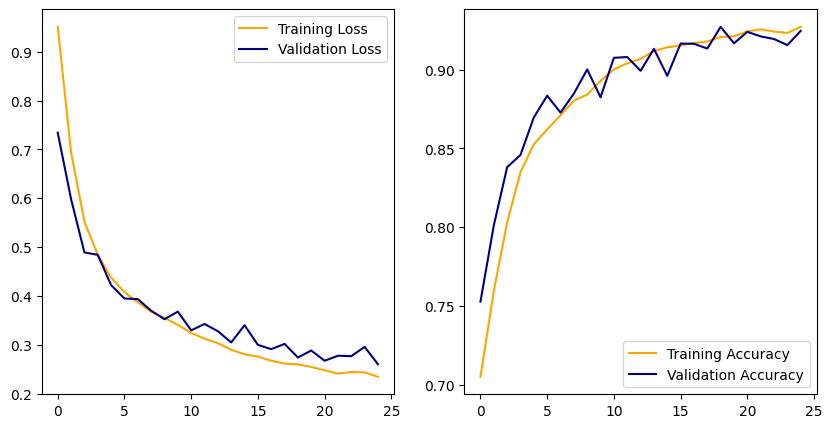

In [21]:
# took this code from my lab on regression and keras
train_loss = res.history['loss']
test_loss = res.history['val_loss']

train_mse = res.history['accuracy']
test_mse = res.history['val_accuracy']

# took this code from my project 3 when I was constructing graphs
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(train_loss, label = 'Training Loss', color = 'orange')
ax[0].plot(test_loss, label = 'Validation Loss', color = 'navy')
ax[0].legend()

ax[1].plot(train_mse, label = 'Training Accuracy', color = 'orange')
ax[1].plot(test_mse, label = 'Validation Accuracy', color = 'navy')
ax[1].legend();

In [20]:
res.history['accuracy'][-1], res.history['val_accuracy'][-1]

(0.927143394947052, 0.9245758652687073)

In [43]:
score = model.evaluate(X_test_sc,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2602
Test Accuracy : 0.9246


* Accuracy and F1 Scores

In [57]:
y_prob = model.predict(X_test_sc)
y_pred = np.argmax(y_prob, axis=1)

187/187 [==============================] - 0s 2ms/step


* creating 1d-arrays for the classification labels

In [61]:
y_binary = np.argmax(y_test, axis=1)

In [68]:
nn_recall = recall_score(y_binary, y_pred, average = 'weighted')
nn_precision = precision_score(y_binary, y_pred, average = 'weighted')

nn_f1 = f1_score(y_binary, y_pred, average = 'weighted')
nn_accuracy = accuracy_score(y_binary, y_pred)

nn_scores = pd.DataFrame(columns = ['Recall', 'Precision', 'F1', 'Accuracy'])
nn_scores.loc['NeuralNetwork'] = [nn_recall, nn_precision, nn_f1, nn_accuracy]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
nn_scores

,Recall,Precision,F1,Accuracy
NeuralNetwork,0.924576,0.914596,0.917571,0.924576
